In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mnist_train.txt')

In [4]:
df.shape

(42000, 785)

In [5]:
df.head(n=5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data = df.values
data.shape

(42000, 785)

In [7]:
X = data[:,1:]
Y = data[:,0]
print(X.shape,Y.shape)

(42000, 784) (42000,)


In [8]:
split = int(0.8*X.shape[0])
X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

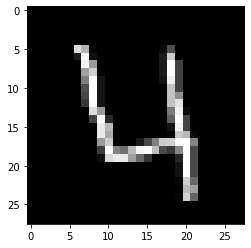

In [11]:
#Visualise samples

def draw(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

draw(X_train[3])    
    

In [12]:
#Apply KNN

In [34]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,query,k=5):
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(query,X[i])
        vals.append((d,Y[i]))
    vals = sorted(vals)
    #Nearest k points
    vals = vals[:k]
    
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print new_vals
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

In [35]:
#Predictions

In [36]:
pred = knn(X_train,Y_train,X_test[5])
print(int(pred))

6


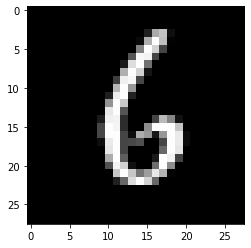

6


In [37]:
draw(X_test[5])
print(Y_test[5])